## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
comb_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
comb_data.rename(columns={"Tumor_Volume_mm3": "Tumor Volume (mm3)", "Age_months": "Age (months)"}, inplace=True)

# Display the data table for preview
comb_data.head()

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
print(f"Total mice number in merged dataframe: {len(comb_data['Mouse ID'].value_counts())}")

Total mice number in merged dataframe: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = comb_data.loc[comb_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
len(duplicate_mice)

1

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id=pd.DataFrame(duplicate_mice)
duplicate_mouse_id.head()

,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = comb_data[comb_data['Mouse ID'].isin(duplicate_mice)==False]
clean_mice.head()

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
print(f"Total mice number in cleaned dataframe: {len(clean_mice['Mouse ID'].value_counts())}")

Total mice number in cleaned dataframe: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

regimen_mean = clean_mice.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_med = clean_mice.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_var = clean_mice.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_std = clean_mice.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_sem = clean_mice.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

sum_stats_table = pd.DataFrame({"Tumor Volume Mean (mm3)": regimen_mean, 
                                    "Tumor Volume Med (mm3)":regimen_med, 
                                    "Tumor Volume Var (mm3)":regimen_var, 
                                    "Tumor Volume Std Dev (mm3)": regimen_std, 
                                    "Tumor Volume SEM (mm3)": regimen_sem})

sum_stats_table = sum_stats_table.sort_values(by="Tumor Volume Mean (mm3)", ascending=True)
sum_stats_table

,Tumor Volume Mean (mm3),Tumor Volume Med (mm3),Tumor Volume Var (mm3),Tumor Volume Std Dev (mm3),Tumor Volume SEM (mm3)
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
data_points = clean_mice['Drug Regimen'].value_counts()
data = pd.DataFrame(data_points)
data = dF.reset_index(drop=False)
data = dF.sort_values(by="Drug Regimen", ascending=True)

x_axis= 'index'
y_axis = 'Drug Regimen'
pandas_bar = dF.plot.barh(x_axis, y_axis, title='Mice per Treatment', xlim=(0,240), ylim=(0,10), color="blue", alpha=.75, 
                          figsize = (13,5), width = 0.75, stacked=True)
pandas_bar.set_ylabel("Drug Regimen")
pandas_bar.set_xlabel("Mice Number")
pandas_bar.grid(True, linestyle='-', which='major', color='grey', alpha=.5)


NameError: name 'dF' is not defined

In [ ]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis= np.arange(len(data))
y_axis = data["Drug Regimen"]
plt.figure(figsize=(13,5))
bar_chart = plt.barh(x_axis, y_axis, color = 'b', alpha= 1, align='center', label='Drug Regimen') 
plt.xlim(0,240)
plt.ylim(-0.75,9.75)

plt.title('Mice per Treatment')
plt.xlabel("Mice Number")
plt.ylabel("Drug Regimen")
plt.legend(loc='best')

tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, dF["index"], rotation="horizontal")
plt.grid(True, linestyle='-', which='major',
                   color='grey', alpha=.5)
plt.show()

Text(0, 0.5, 'Sex')

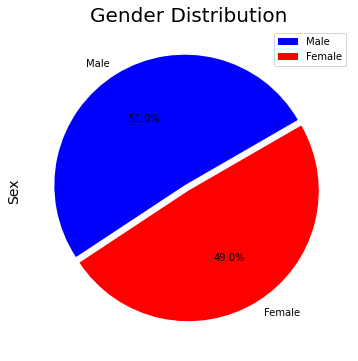

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male = (len(clean_mice.loc[clean_mice["Sex"] == "Male",:])/len(clean_mice["Sex"]))*100
female = (len(clean_mice.loc[clean_mice["Sex"] == "Female",:])/len(clean_mice["Sex"]))*100
gender_df = pd.DataFrame({"Sex": [male, female], "Mice":["Male", "Female"]})
gender_df = gender_df.set_index('Mice')

plot = gender_df.plot.pie(y="Sex", figsize =(6, 6), explode=(0.05,0), colors = 'br', autopct='%1.1f%%',
                          startangle = 30)

plt.title('Gender Distribution',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)


Text(0, 0.5, 'Sex')

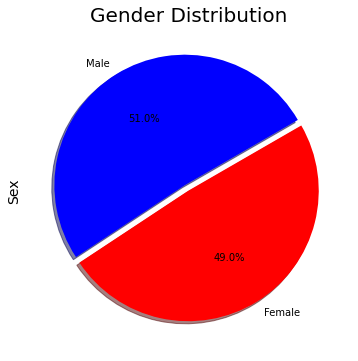

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male = (len(clean_mice.loc[clean_mice["Sex"] == "Male",:])/len(clean_mice["Sex"]))*100
female = (len(clean_mice.loc[clean_mice["Sex"] == "Female",:])/len(clean_mice["Sex"]))*100
gender_df = pd.DataFrame({"Sex": [male, female], "Mice":["Male", "Female"]})
gender_df = gender_df.set_index('Mice')

labels = ["Male","Female"]
sizes = [male,female]
colors = ['blue', 'red']
explode = (0.05, 0)
fig1, ax1 = plt.subplots(figsize=(6, 6))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=30,)
plt.title('Gender Distribution',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
